# 决策树-ID3算法

## 决策树算法思想
决策树（decision tree）是一个树结构（可以是二叉树或者非二叉树）。

**其中每个非叶节点表示一个特征属性上的测试，每个分支代表这个特征属性在某个值域上的输出，而每个叶节点存放在一个类别。**

使用决策树进行决策的过程就是从根节点开始，测试待分类项中相应的特征属性，并按照其值选择输出分支，直到到达叶子节点，将叶子节点存放的类别作为决策结果。

举个例子，让我们看一下决策树从根节点开始一步步走到叶子节点：
![id3示例](./image/id3-tree-example.png)

如上图所示，比如小明一家五口人，让我们使用决策树来判断谁喜欢玩电子游戏。一般情况下，在一家人中年龄小的喜欢玩，年龄大的就不那么热爱游戏了，所以我们先做一个判断，年龄是否小于15岁，然后再细分，判断是男孩还是女孩，一般情况下，我们知道男孩比较喜欢玩电子游戏，所以我们再做一个判断，性别是男还是女，最后得到是小明。

或者，其实我们生活当中经常在用决策树，只是我们自己没有发现。**决策树的本质就是一堆if-else的组合**，举个经典的例子，比如我们去小摊子上买西瓜。水果摊的小贩都是怎么做的？拿起西瓜翻滚一圈，看一眼，然后伸手一拍，就知道西瓜甜不甜。我们把这些动作相关的因素去除，把核心本质提取出来，基本上是这么三条：
- 西瓜表面的颜色，颜色鲜艳的往往比较甜
- 西瓜拍打的声音，声音清脆的往往比较甜
- 西瓜是否有瓜藤，有藤的往往比较甜
这三条**显然不是平等的，因为拍打的声音是最重要的，可能其次表面颜色，最后是瓜藤**。所以我们挑选的时候，肯定也是先听声音，然后看瓜藤，最后看颜色。我们把其中的逻辑抽象出来然后整理一下，变成一棵树结构，于是这就成了决策树。

这个决策树本质上做的还是分类的工作，将西瓜分成了甜的和不甜的。也就是说决策树是一个树形的分类器，这个也是决策树的基本定义。另外我们还有一个启示，在这个问题当中，决策树的特征都是离散值，而不是连续值。**也就是说决策树可以接受像是类别、标识这样非数值型的特征，而逻辑回归这些模型则不太行。**

从上面简单的例子，我们可以看出一个决策树的组成，分为三个：根节点；非叶子节点与分支；叶子节点。具体意思如下：

- 根节点：第一个选择点
- 非叶子节点与分支：中间过程
- 叶子节点：最终的决策结果

当然我们也发现：一旦构造好了决策树，那么分类或预测任务就很简单了，只需要走一遍即可，但是难点就在于如何构造出来一棵树。构造树需要考虑的问题有很多。

## 决策树算法组成
决策树主要由特征选择、决策树生成、决策树裁减三部分组成。

#### 特征选择
特征选择是指从训练数据中众多的特征中选择一个特征作为当前节点的分裂标准，**如何选择特征有着很多不同量化评估标准，从而衍生出不同的决策树算法。**

#### 决策树生成
根据选择的特征评估标准，从上至下递归地生成子节点，直到数据集不可分则停止决策树停止生长。树结构来说，递归结构是最容易理解的方式。

#### 决策树裁减
决策树容易过拟合，一般来需要剪枝，缩小树结构规则，缓解过拟合，剪枝技术有预剪枝和后剪枝两种

## 决策树示例
决策树表示如下（借用周志华老师西瓜书的图）
![demo1](./image/demo1.png)
假如我现在告诉你，我买了一个西瓜，它的特点是**纹理是清晰，根蒂是硬挺的瓜**，你来给我判断一下是好瓜还是坏瓜，恰好，你构建了一颗决策树，告诉他，没问题，我马上告诉你是好瓜，还是坏瓜？

判断步骤如下示:

根据纹理特征，已知是清晰，那么走下面这条路，红色标记：
![demo11](./image/demo11.png)

好了，现在到了第二层，这个时候，由决策树的图，我们可以看到，我们需要知道根蒂的特征是什么了？对是硬挺，于是我们继续走，如下蓝色的图：

![demo12](./image/demo12.png)

此时，我们到达叶子结点了，根据上面总结的点，可知，叶子结点代表一种类别，我们从如上决策树中可以知道，这是一个坏瓜！！

所以根据上面的例子，非常直观容易的得到了一个实例的类别判断，**只要你告诉我各个特征的具体值，决策树的判定过程就相当于树中从跟节点到某一个叶子节点的遍历，每一步如何遍历是由数据各个特征的具体特征属性决定**。

好了，可能有人要问了，说了这么多，给你训练数据，你的决策树是怎么构建的呢？**没有树，谈何遍历，谈何分类？**

#### 构建决策树
**于是构建决策树也就成了最重要的工作！！**

比如，给我下面的训练数据，我们如何构建出决策树？
![data1](./image/id3-data1.png)

我们可以从上面的决策树看出，每一次子结点的产生，是由于我在当前层数选择了不同的特征来作为我的分裂因素造成的，比如下面红色三角形表示选择的特征:

![feature](./image/feature1.png)
每一层选择了指定的特征之后，我们就可以继续由该特征的不同属性值进行划分，依次一直到叶子节点。

看起来一切很顺利，但是，细心地小伙伴可能会问了，**为什么在第一次选择特征分裂的时候，不选择触感呢？而是选择纹理**，比如如下：
![feature](./image/feature11.png)
**不换成抽干，或者是其他特征呢？为什么选择的是纹理，这是以什么标准来选择特征的？**

这就需要我们在越顶层提取规则的时候，**越选择一些区分度大的特征作为切分的依据**。所谓区分度大的特征，也就是能够将数据很好分开的特征。这是明显的**贪心做法**，使用这样的方法，我们只可以保证在尽可能高层取得尽可能好的分类结果，但是并不能保证这样得到的模型是最优的。生成最优的决策树本质上也是一个NP问题，我们当前的做法可以保证在尽量短的时间内获得一个足够优秀的解，但是没办法保证是最优解。

如果一个训练数据中有20个特征，那么选取哪个做划分依据？这就必须采用量化的方法来判断，量化划分方法有多重，其中一项就是“信息论度量信息分类”。

**基于信息论的决策树算法有ID3、CART和C4.5等算法，其中C4.5和CART两种算法从ID3算法中衍生而来。**

决策树的生成算法由很多变形，这里我们主要简单介绍一下经典的实现算法：ID3算法。


## ID3算法

ID3算法的核心是信息墒，通过计算每个属性的信息增益，认为增益高的是好属性，易于分类。每次划分选取信息增益最高的属性作为划分标准，进行重复，直至生成一个能完美分类训练样历的决策树。

这里借用老师课堂的相关讲解来说明:

算法描述:
```
输入：例子集（正例、反例）；
输出：决策树
从树的根结点开始，每次都用“最好的属性”划分结点，直到所有结点只含一类例子为止。
```

比如这里根据相关的天气情况，来预测能不能打网球，其中P是正例(代表可以打球)、N是反例(代表不可以打球)
![tq1](./image/tq1.png)
![tq2](./image/tq2.png)

![tree1](./image/tree1.png)
> 这里借用林鸿同学在语雀上记录的详细的解说笔记，感谢！

决策树的生长过程：
```
1.有14个例子，{1,2,..,14}     
2.先用overlook生长这个树，outlook有三个属性值，晴天，下雨，多云。所以有三个分支。      
3.第一个例子是晴天，是反例，所以走sunny分支，记为1-。以此类推形成例子集合{1-, 2-, 8-, 9+, 11+}。     
4.再看outlook等于多云，{3+,7+,12+,13+}，该例子集合中只有正例没有反例，则在集合下面标注P（表示正例），下面不再生长。换成反例同理，标注N。 
5.再看outlook等于下雨的，{4+，5+，6-，10+，14-}
6.既有正例和反例的节点继续生长。用湿度继续生长树，湿度是两个值high和 normal
7.在第sunny分支下继续写high和normal的集合，high {1-,2-,8-}, normal {9+,11+}，所以 high就标N，normal只含有正例，就标P。生长完毕。
8.再看rain，反正都有，继续生长。用wind来生长这棵树。有风True 和 没有风false。风力false的集合{4+,5+,10+}，下面标P，true {6-,14-}，下面标N。生长完毕。
```

实际上对于给定的一个例子集合，有无数个决策树与之匹配。例如下面这棵树:
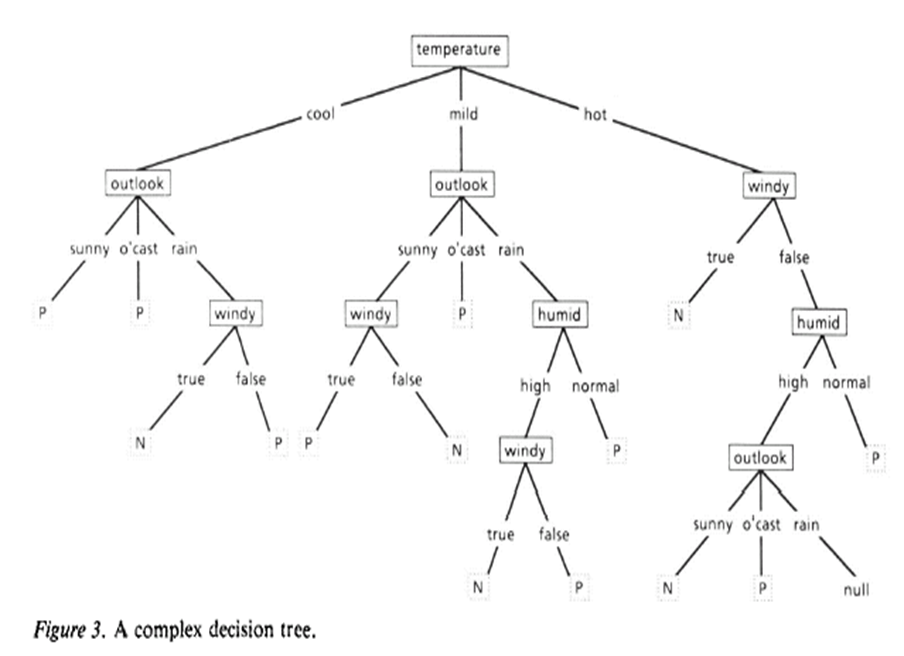
我们会发现这两棵树都总结了例子的规律。但是ID3生成的树比较好。
ID3生成的决策树总是比较小的（即节点少）。在机器学习中，得到的结果越简单，意味着做预测精度越高。有一个哲学观点支持这个结论：如果描述一个事物有两种描述方式，较简单的那个是好的。在实践中也证明了这一点。
其他的人想了很多方法生成决策树，都没有比ID3生成的树更小的。

那么ID3是如何选择合适的属性的？基于信息增益计算公式。哪个属性的信息增益大，就用哪个属性来生成树，这个属性就是形式化描述中的“最好的属性”。
![xinxishang](./image/xinxishang.png)
> - A是某一个属性，p是该结点中正例的个数，n是反例的个数。
> - v是A的属性值的个数。比如属性outloook有3个属性值，晴天，下雨，多云，v=3。
> - pi表示属性值等于Ai的正例数，ni表示属性值等于Ai的反例数。

计算示例：

以第一轮为示例, 从根节点开始:
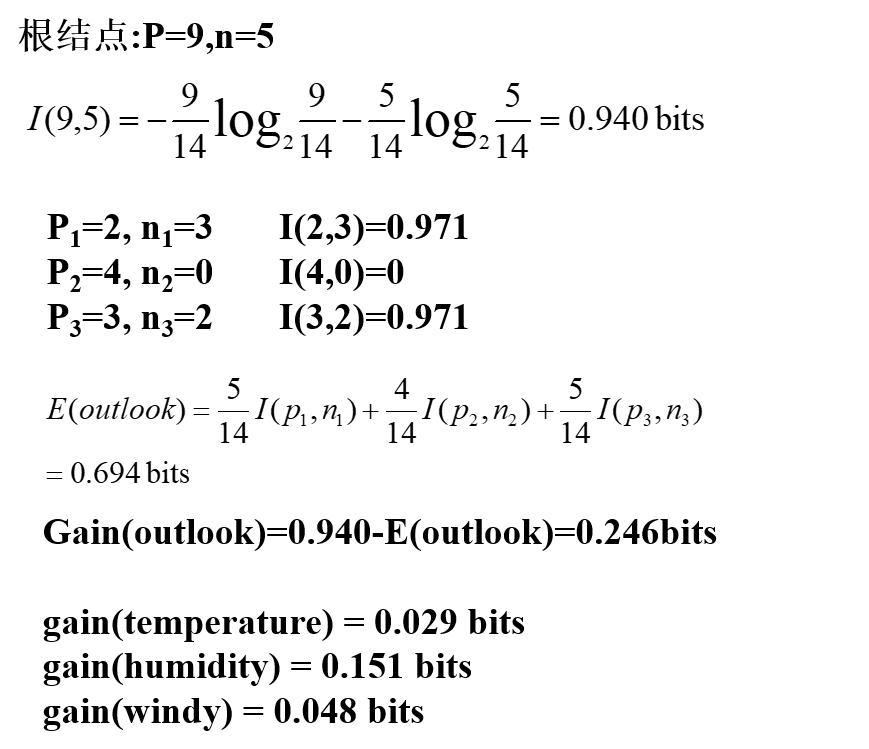
> - p1,n1, p2,n2, p3, n3分别是outlook的三个属性sunny、overcast、rain的正反例个数
> - 经过计算，outlook的信息增益最大，所以根节点从outlook开始

这里需要着重注意的是: **后面的每一轮计算，是以新的分支节点为自身的根节点再进行的，参考上面决策树生成示例图。如经过第一轮计算选择了outlook特征后，sunny属性分支此时为{1-, 2-, 8-, 9+, 11+}, 则下一步的信息增益是以{1-, 2-, 8-, 9+, 11+}为基础进行计算的，以此类推。**

## ID3算法代码实现和讲解
在这部分我们将基于上部分的ID3算法理论，然后进行相关的一步步的实现。

**相关的实例，我们也将用老师在课堂上的打篮球的示例和相关数据(相关数据先保存成csv文件)。**

#### 读取数据
数据都用csv文件保存，每个特征以,分割，最后一例是标签例子，即正例或者反例

In [1]:
import math
import pandas as pd

csv_file = "./tq.csv"
# 正例的标识(对应csv的class)
p_flag = "p"
# 反例的标识(对应csv的class)
n_flag = "n"

# 这里读取一个csv文件，每个特征以,分割，最后一例是标签例子，即正例或者反例
def loadDataSet(csvfile: str):
    """
    导入数据
    @ return dataSet: 读取的数据集
    """
    # 对数据进行处理
    dataSet = pd.read_csv(csvfile, delimiter=',')
    # 读取出所有的特征列，包含标签(正反例)
    feature_labels = list(dataSet.columns.values)
    # 读取出数据值
    dataSet = dataSet.values
    return dataSet, feature_labels

if __name__ == "__main__":
    dataSet, features = loadDataSet(csv_file)
    print(dataSet)
    print(features)


[['sunny' 'hot' 'high' False 'n']
 ['sunny' 'hot' 'high' True 'n']
 ['overcast' 'hot' 'high' False 'p']
 ['rain' 'mild' 'high' False 'p']
 ['rain' 'cool' 'normal' False 'p']
 ['rain' 'cool' 'normal' True 'n']
 ['overcast' 'cool' 'normal' True 'p']
 ['sunny' 'mild' 'high' False 'n']
 ['sunny' 'cool' 'normal' False 'p']
 ['rain' 'mild' 'normal' False 'p']
 ['sunny' 'mild' 'normal' True 'p']
 ['overcast' 'mild' 'high' True 'p']
 ['overcast' 'hot' 'normal' False 'p']
 ['rain' 'mild' 'high' True 'n']]
['outlook', 'temperature', 'humidity', 'wind', 'class']


#### 计算信息增益
这里我们按照老师给出的算法实现相关计算信息增益的步骤,主要分为:
![suanfa](./image/suanfa.png)
1. I(p, n)
2. E(A)
3. gain

后面的步骤计算验证都可以参阅老师的实例计算进行对比:
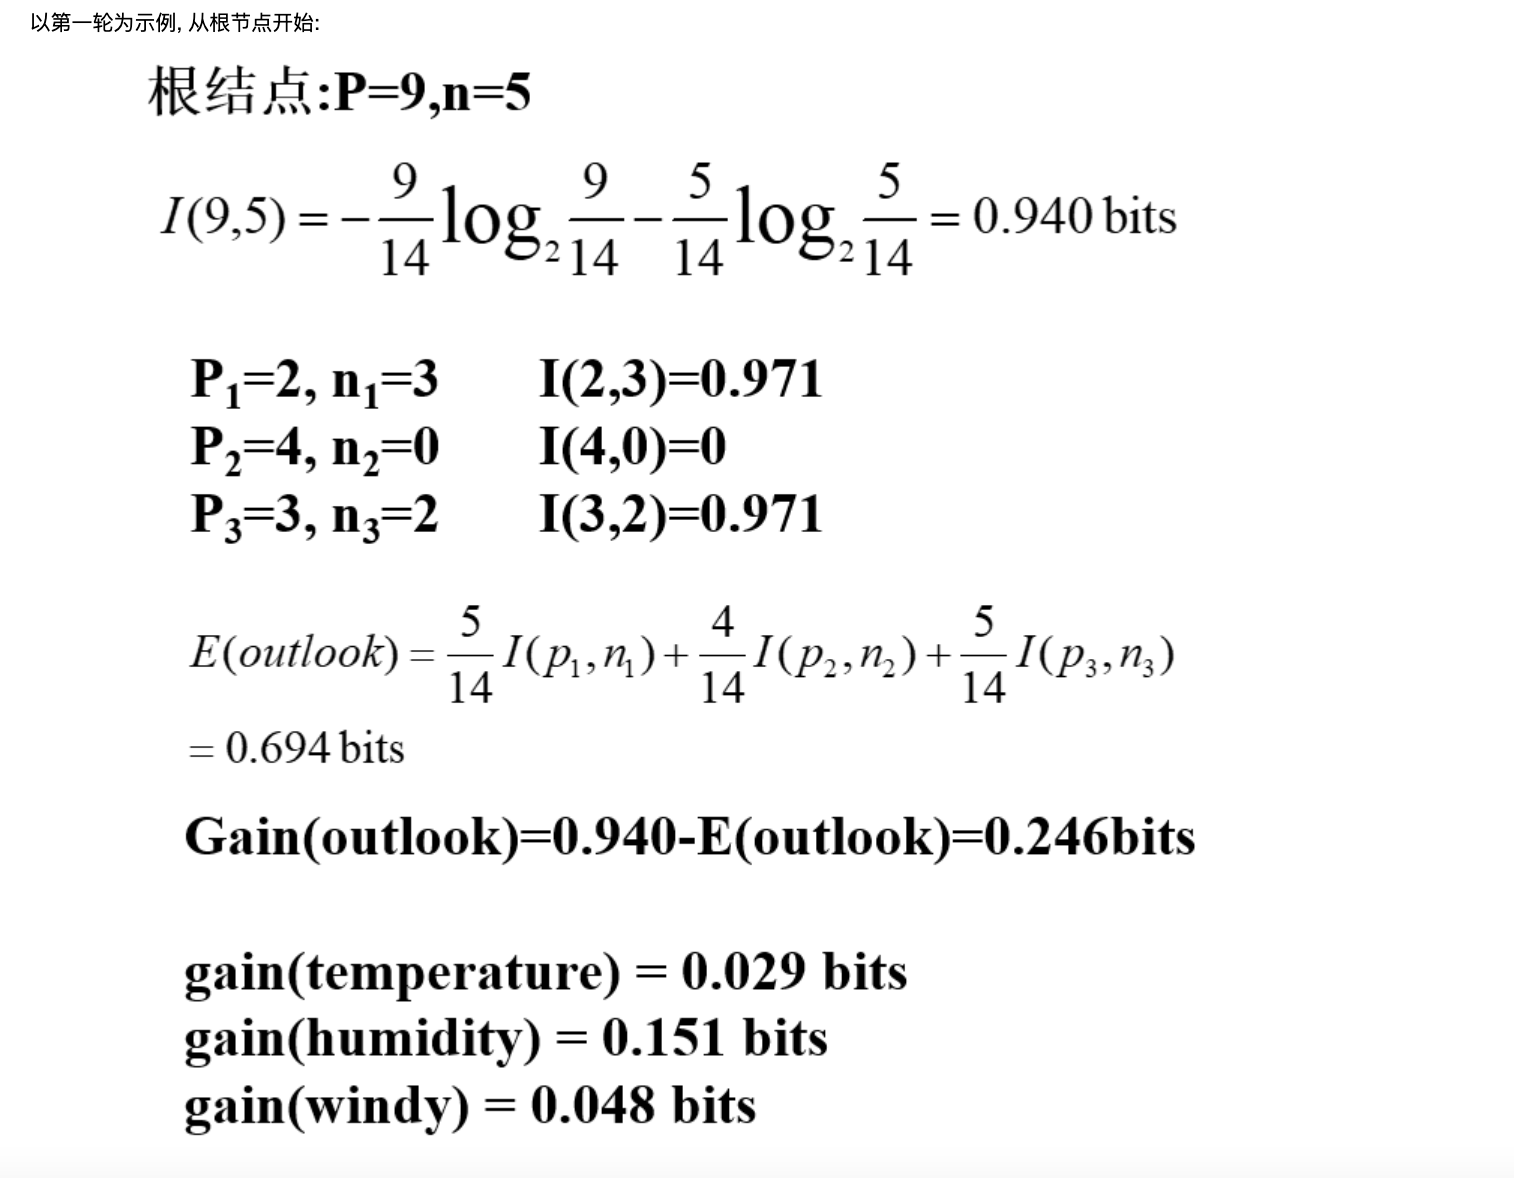

In [2]:
def calcIpn(p:int, n: int):
    """
    按书上公示计算I(p,n)
    :param p: 正例个数
    :param n: 反例个数
    :return:
    I(p, n)的结果
    """
    # 注意: p, n为0的特殊情况
    return -(p/(p+n))*math.log2(p/(p+n))-(n/(p+n))*math.log2(n/(p+n)) if p != 0 and n != 0 else 0
    return retDataSet

if __name__ == "__main__":
    p, n = 9, 5
    ipn = calcIpn(p, n)
    print(ipn)
    

0.9402859586706311


In [3]:
def getOneFeatureAttrs(dataSet: list, feature_idx: int):
    """
    获取一个特征的所有属性值
    @ param dataSet: 数据集
    @ param feature: 指定的一个特征(这里是用下标0，1，2..表示)
    """
    attrs = [data[feature_idx] for data in dataSet]
    return set(attrs)

def getDatasetPN(dataSet: list):
    """
    获取数据集的p, n值
    :param dataSet: 数据集
    :return:
    """
    p, n = 0, 0
    for data in dataSet:
        label = data[-1]
        if label == p_flag:
            p += 1
        elif label == n_flag:
            n += 1
    return p, n


def getOneFeatureAttrPN(dataSet: list, feature_idx: int, attr: str):
    """
    计算一个特征对应的属性的p, n值
    :param dataSet: 数据集
    :param feature_idx: 指定的一个特征(这里是用下标0，1，2..表示)
    :param attr: 属性名称, 如sunny, windy...
    :return:
    """
    p = 0
    n = 0
    for data in dataSet:
        if data[feature_idx] == attr:
            # 类别即标签值,为数组的最后一列
            label = data[-1]
            if label == p_flag:
                p += 1
            elif label == n_flag:
                n += 1
    return p, n

if __name__ == "__main__":
    dataSet, features = loadDataSet(csv_file)
    p, n =getDatasetPN(dataSet)
    print(f'dataset p is:{p}, n is:{n}')
    p, n =getOneFeatureAttrPN(dataSet, 0, "sunny") #0即是outlook对应的特征
    print(f'dataset feature outlook p is:{p}, n is:{n}')

dataset p is:9, n is:5
dataset feature outlook p is:2, n is:3


In [4]:
def calcOneFeatureEa(dataSet: list, feature_idx: int):
    """
    获取一个特征的E(A)值
    :param dataSet: 数据集
    :param feature_idx: 指定的一个特征(这里是用下标0，1，2..表示)
    :return:
    """
    attrs = getOneFeatureAttrs(dataSet, feature_idx)
    # 获取数据集的p, n值
    p, n = getDatasetPN(dataSet)
    ea = 0.0
    for attr in attrs:
        # 获取每个属性值对应的p, n值
        attrP, attrN = getOneFeatureAttrPN(dataSet, feature_idx, attr)
        # 计算属性对应的ipn
        attrIPN = calcIpn(attrP, attrN)
        ea += (attrP+attrN)/(p+n) * attrIPN
    return ea

def calcOneFeatureGain(dataSet: list, feature_idx: int):
    """
    获取一个特征的信息增益
    :param dataSet: 数据集
    :param feature_idx: 数据集
    :return:
    """
    # Gain(A) = I(p,n) - E(A)
    p, n = getDatasetPN(dataSet)
    ipn = calcIpn(p, n)
    gain = ipn - calcOneFeatureEa(dataSet, feature_idx)
    return gain

if __name__ == "__main__":
    dataSet, features = loadDataSet(csv_file)
    ea = calcOneFeatureEa(dataSet, 0)#0即是outlook对应的特征
#     print(f'feature outlook ea is:{ea}')
    # 获取所有特征的信息增益
    for idx, feature in enumerate(features):
        # 最后一列是特征
        if idx == len(features)-1:
            break
        gain = calcOneFeatureGain(dataSet, idx)
        print(f'feature:{feature} gain is:{gain}')

feature:outlook gain is:0.24674981977443933
feature:temperature gain is:0.02922256565895487
feature:humidity gain is:0.15183550136234159
feature:wind gain is:0.04812703040826949


In [5]:
def selectBestFeature(dataSet: list):
    """
    计算信息增益，挑选最好的特征值
    :param dataSet: 数据集
    :return:
    """
    # 不使用最后一列标签列
    best_feature_idx = 0
    gain = float('-inf')
    for feature_idx in range(len(dataSet[0])-1):
        gain_tmp = calcOneFeatureGain(dataSet, feature_idx)
        if gain_tmp > gain:
            best_feature_idx = feature_idx
            gain = gain_tmp
    return best_feature_idx

if __name__ == "__main__":
    dataSet, features = loadDataSet(csv_file)
    # 计算第一轮获取的最优特征
    best_feature_idx = selectBestFeature(dataSet)
    best_feature_name = features[best_feature_idx]
    print(f'best feature is:{best_feature_name}')

best feature is:outlook


#### 创建决策树
这里采用简单的递归方式进行决策树的创建。

> 因为我们每一步都需要按筛选的特征在分叉，分成不同的树，比如第一轮筛选了outlook后，还需要按sunny, windy, overcast三个属性值分叉，分别获取属性值如sunny对应的样本，然后把该切分的样本作为一颗新的树，进行递归构建

In [6]:
def splitDataByFeatureAttr(dataSet: list, feature_idx: int, attr: str):
    """
    获取一个相关特征属性值的样本集合。如获取所有outlook特征是sunny的样本数(即csv的行)
    :param dataSet: 数据集
    :param feature_idx: 指定的一个特征(这里是用下标0，1，2..表示)
    :param attr: 属性名
    :return:
    """
    retData = []
    for data in dataSet:
        if data[feature_idx] == attr:
            retData.append(data)
    return retData

def createId3Tree(dataSet: list, feature_labels: list):
    """
    递归构建一颗id3的决策树
    :param dataSet: 数据集
    :return:
    """
    # 终止条件: 数据集里只有一种样例的时候,正样例or反样例

    # 获取该数据集的所有样例属性值集合(即最后一列的class类的p, n集合)
    classList = [data[-1] for data in dataSet]
    # 当只有正列或者反例的时候，停止
    if classList.count(classList[0]) == len(classList):
        return classList[0]

    # 通过信息增益，计算获取最好的特征值
    best_feature_idx = selectBestFeature(dataSet)
    best_feature_label = feature_labels[best_feature_idx]
    myTree = {best_feature_label: {}}

    # 开启按该特征的所有属性值(如outlook对应的sunny,rain, overcast）重新分叉生成新的树
    # 可以对照示意图看
    attrs = getOneFeatureAttrs(dataSet, best_feature_idx)
    for attr in attrs:
        splitDataset = splitDataByFeatureAttr(dataSet, best_feature_idx, attr)
        splitLabel = feature_labels[:]
        myTree[best_feature_label][attr] = createId3Tree(splitDataset, splitLabel)
    return myTree


if __name__ == "__main__":
    dataSet, features = loadDataSet(csv_file)
    # 构建树
    tree = createId3Tree(dataSet, features)
    print(f'id3 tree is:{tree}')


id3 tree is:{'outlook': {'overcast': 'p', 'sunny': {'humidity': {'high': 'n', 'normal': 'p'}}, 'rain': {'wind': {False: 'p', True: 'n'}}}}


#### 树的绘制
这里我们借用网上的一代代码来实现树的可视化操作

id3 tree is:{'outlook': {'overcast': 'p', 'sunny': {'humidity': {'high': 'n', 'normal': 'p'}}, 'rain': {'wind': {False: 'p', True: 'n'}}}}


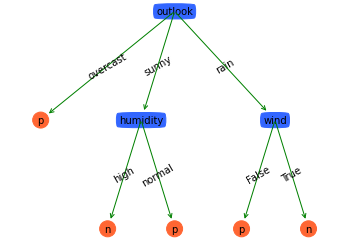

In [7]:
import matplotlib.pyplot as plt
# 定义文本框和箭头格式
decisionNode = dict(boxstyle="round4", color='#3366FF')  #定义判断结点形态
leafNode = dict(boxstyle="circle", color='#FF6633')  #定义叶结点形态
arrow_args = dict(arrowstyle="<-", color='g')  #定义箭头

#绘制带箭头的注释
def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeTxt, xy=parentPt, xycoords='axes fraction',
                            xytext=centerPt, textcoords='axes fraction',
                            va="center", ha="center", bbox=nodeType, arrowprops=arrow_args)
#计算叶结点数
def getNumLeafs(myTree):
    numLeafs = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            numLeafs += getNumLeafs(secondDict[key])
        else:
            numLeafs += 1
    return numLeafs


#计算树的层数
def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:
            thisDepth = 1
        if thisDepth > maxDepth:
            maxDepth = thisDepth
    return maxDepth


#在父子结点间填充文本信息
def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0] - cntrPt[0]) / 2.0 + cntrPt[0]
    yMid = (parentPt[1] - cntrPt[1]) / 2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30)


def plotTree(myTree, parentPt, nodeTxt):
    numLeafs = getNumLeafs(myTree)
    depth = getTreeDepth(myTree)
    firstStr = list(myTree.keys())[0]
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs)) / 2.0 / plotTree.totalW, plotTree.yOff)
    plotMidText(cntrPt, parentPt, nodeTxt)  #在父子结点间填充文本信息
    plotNode(firstStr, cntrPt, parentPt, decisionNode)  #绘制带箭头的注释
    secondDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0 / plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            plotTree(secondDict[key], cntrPt, str(key))
        else:
            plotTree.xOff = plotTree.xOff + 1.0 / plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0 / plotTree.totalD


def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)
    plotTree.totalW = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    plotTree.xOff = -0.5 / plotTree.totalW;
    plotTree.yOff = 1.0;
    plotTree(inTree, (0.5, 1.0), '')
    plt.show()

if __name__ == "__main__":
    dataSet, feature_labels = loadDataSet(csv_file)
    myTree = createId3Tree(dataSet, feature_labels)
    print(f"id3 tree is:{myTree}")
    createPlot(myTree)
